<a href="https://colab.research.google.com/github/noircir/TensorFlow-Examples/blob/master/Simple_ANN_to_convert_Celcius_to_Fahrenheit_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# T(f) = T(C) *9/5 + 32

!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 55kB/s 
     |████████████████████████████████| 419kB 45.5MB/s 
     |████████████████████████████████| 3.0MB 32.5MB/s 


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
temp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Project 1 Celcius to Fahrenheit/Celsius-to-Fahrenheit.csv')

In [7]:
temp_df.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [8]:
temp_df.shape

(30, 2)

In [9]:
temp_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [10]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


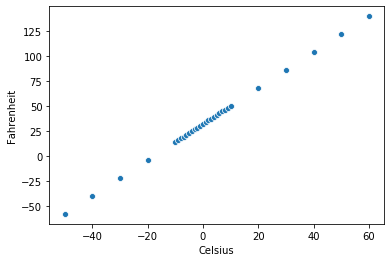

In [11]:
sns.scatterplot(temp_df['Celsius'], temp_df['Fahrenheit'])

In [12]:
X_train = temp_df['Celsius']
y_train = temp_df['Fahrenheit']
X_train.shape

(30,)

In [13]:
y_train.shape

(30,)

In [0]:
# create a model with one layer (one weights, one bias)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1])) # one weight and one bias

In [19]:
# vizualize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# specify an optimizer type with a learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(0.8), loss='mean_squared_error')

In [21]:
epochs_hist = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
30/30 [==============================] - 1s 23ms/sample - loss: 1189.3352
Epoch 2/500
30/30 [==============================] - 0s 265us/sample - loss: 989.6683
Epoch 3/500
30/30 [==============================] - 0s 239us/sample - loss: 1051.5029
Epoch 4/500
30/30 [==============================] - 0s 158us/sample - loss: 938.5480
Epoch 5/500
30/30 [==============================] - 0s 185us/sample - loss: 825.9216
Epoch 6/500
30/30 [==============================] - 0s 201us/sample - loss: 803.1168
Epoch 7/500
30/30 [==============================] - 0s 186us/sample - loss: 800.5528
Epoch 8/500
30/30 [==============================] - 0s 185us/sample - loss: 746.5761
Epoch 9/500
30/30 [==============================] - 0s 233us/sample - loss: 667.4161
Epoch 10/500
30/30 [==============================] - 0s 163us/sample - loss: 613.6897
Epoch 11/500
30/30 [==============================] - 0s 125us/sample - loss: 594.5869
Epoch 12/500
30/30 [==============================]

## Evaluate the model

In [23]:
epochs_hist.history.keys()

dict_keys(['loss'])

In [26]:
epochs_hist.history['loss'][1:10]

[989.6683349609375,
 1051.5029296875,
 938.5480346679688,
 825.9215698242188,
 803.1168212890625,
 800.5527954101562,
 746.5761108398438,
 667.4160766601562,
 613.689697265625]

Text(0, 0.5, 'Training Loss')

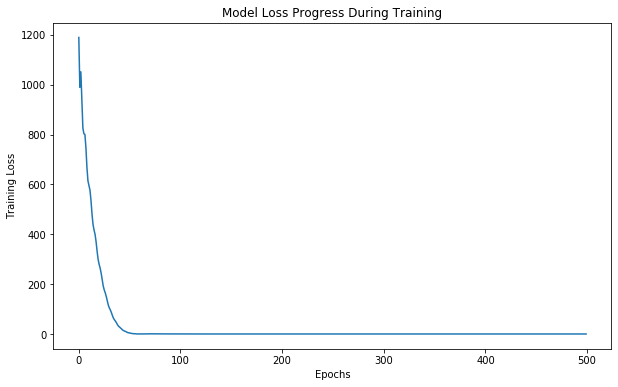

In [32]:
plt.figure(figsize=(10,6))
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')

In [33]:
# what are the weights which the model has determined to be the best?

model.get_weights()

[array([[1.8000001]], dtype=float32), array([32.], dtype=float32)]

In [0]:
# That is exactly what is in the conversion formula: T(f) = T(C) *9/5 + 32
# 9/5 is 1.8 and bias 32
# So, instead of defining the formula in advance (as in traditional programming),
# we fed data with known inputs and outputs and the machine determined the formula.

In [39]:
TempC = [-35, -20, 0, 10, 20, 30]

print('Temperature conversion using trained ANN')
print('='*40)
for tempC in TempC:
  tempF = model.predict([tempC])
  print('Temp {} in DegC = temp {} in degF'.format(tempC, tempF))


Temperature conversion using trained ANN
Temp -35 in DegC = temp [[-31.000004]] in degF
Temp -20 in DegC = temp [[-4.]] in degF
Temp 0 in DegC = temp [[32.]] in degF
Temp 10 in DegC = temp [[50.]] in degF
Temp 20 in DegC = temp [[68.]] in degF
Temp 30 in DegC = temp [[86.]] in degF
